In [2]:
import time
import re
import bisect

import numpy as np

from dasly.master import Dasly
from dasly.simpledas import simpleDASreader
from dasly import loader

In [3]:
folder_path = '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard'
start = '20220822 122539'
duration = 30

In [4]:
s_rate = 0.25
das = Dasly()
das.load_data(
    folder_path=folder_path,
    start=start,
    duration=duration,
    start_exact_second=False,
    integrate=True,
    chIndex=np.arange(round(5000 * s_rate), round(90000 * s_rate))
)

3 files, from 122539 to 122559


In [5]:
das.file_paths

['/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122539.hdf5',
 '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122549.hdf5',
 '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122559.hdf5']

In [7]:
simpleDASreader.find_DAS_files(folder_path, start, duration)

-- Header info file: 122539.hdf5 --
	Experiment:            Svalbard_2022_Longyearbyen_NORSAR_int_YtreFiber
	File timestamp:        2022-08-22 12:25:39
	Type of data:          Phase rate per distance, unit: rad/(s*m)
	Sampling frequency:    625.00 Hz
	Data shape:            6250 samples x 33748 channels
	Gauge length:          8.2 m
	Sensitivities:         9.36e+06 rad/(strain*m)
	Regions of interest:   0:134988:4
-----------------------------------


(['/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122539.hdf5',
  '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122549.hdf5',
  '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122559.hdf5',
  '/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122609.hdf5'],
 array([    0,     1,     2, ..., 33745, 33746, 33747]),
 slice(0, 18750, None))

In [6]:
simpleDASreader.load_DAS_files('/mnt/Datastore/usr/kptruong/dasly_repo/data/svalbard/20220822/dphi/122539.hdf5', verbose=True)

Loading files: 122539.hdf5  in 1.2 s
Conditioning... Total load time: 3.9 s


,0,4,8,12,16,20,24,28,32,36,...,134952,134956,134960,134964,134968,134972,134976,134980,134984,134988
2022-08-22 12:25:39.000000,2.581936e-09,2.887757e-09,6.718046e-10,1.288461e-09,1.794821e-09,1.609323e-09,5.464679e-10,7.670605e-10,2.727326e-09,3.524468e-09,...,-5.284194e-09,6.206673e-09,1.785797e-08,8.698366e-09,-2.501720e-09,-5.394491e-09,-1.258882e-08,-9.886557e-09,-1.083410e-08,-1.117000e-08
2022-08-22 12:25:39.001600,3.434225e-09,3.880424e-09,6.667912e-10,1.318542e-09,3.589642e-09,4.757780e-09,2.336276e-09,2.030454e-09,5.249100e-09,6.101390e-09,...,5.128777e-09,4.963332e-09,2.857676e-09,-4.090989e-09,-9.826396e-09,-7.871145e-10,-6.943653e-09,-1.106974e-08,-8.939012e-09,-5.198965e-09
2022-08-22 12:25:39.003200,4.196272e-09,4.993414e-09,1.092936e-09,1.935198e-09,6.006133e-09,8.903918e-09,6.387157e-09,5.675245e-09,8.793622e-09,8.618151e-09,...,-8.131843e-09,4.161178e-10,1.678509e-08,-4.577296e-09,-1.051825e-08,1.565706e-08,-7.119131e-10,-2.202416e-08,-1.388730e-08,-1.524094e-09
2022-08-22 12:25:39.004800,5.274168e-09,6.793249e-09,2.040481e-09,2.937892e-09,8.282247e-09,1.271415e-08,1.127027e-08,9.991840e-09,1.282946e-08,1.244844e-08,...,1.299491e-08,5.198966e-09,1.214262e-08,-8.192005e-09,-1.997867e-08,6.191633e-09,-2.752394e-09,-1.584757e-08,1.955253e-10,8.322358e-10
2022-08-22 12:25:39.006400,2.957946e-09,5.224033e-09,2.782474e-09,2.832609e-09,8.547961e-09,1.455410e-08,1.539134e-08,1.351631e-08,1.549663e-08,1.555177e-08,...,2.344297e-08,7.279555e-09,3.855356e-09,-9.916638e-09,-1.361156e-08,1.751204e-08,1.068370e-08,-2.435041e-08,-1.911134e-08,3.599670e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22 12:25:48.992000,-5.760826e-07,-9.006949e-07,-6.009590e-07,-5.442976e-07,-2.826845e-07,2.592462e-08,4.437915e-08,1.589269e-08,7.113602e-08,6.436294e-08,...,4.125196e-07,-2.026731e-07,2.974686e-07,2.051808e-07,-4.381874e-07,6.823538e-07,1.052239e-06,-4.018394e-07,-2.772544e-07,-9.445856e-08
2022-08-22 12:25:48.993600,-5.759422e-07,-8.998426e-07,-5.996906e-07,-5.434403e-07,-2.817118e-07,2.730332e-08,4.580297e-08,1.781285e-08,7.424939e-08,6.876476e-08,...,4.346140e-07,-1.822282e-07,2.973082e-07,1.968685e-07,-4.360066e-07,6.958200e-07,1.060060e-06,-4.101418e-07,-2.981305e-07,-9.381684e-08
2022-08-22 12:25:48.995200,-5.792662e-07,-9.031515e-07,-5.992495e-07,-5.426582e-07,-2.802580e-07,2.968472e-08,4.840997e-08,2.001376e-08,7.683132e-08,7.308637e-08,...,4.096569e-07,-1.967171e-07,3.027478e-07,1.935245e-07,-4.468257e-07,6.934987e-07,1.040362e-06,-4.271124e-07,-2.843635e-07,-8.225579e-08
2022-08-22 12:25:48.996800,-5.813919e-07,-9.053474e-07,-5.994550e-07,-5.426281e-07,-2.791249e-07,3.239700e-08,5.266641e-08,2.388917e-08,7.947342e-08,7.618971e-08,...,4.245770e-07,-1.919844e-07,2.826989e-07,1.794517e-07,-4.163588e-07,7.186012e-07,1.031979e-06,-4.332539e-07,-2.836315e-07,-8.491293e-08


In [9]:
das.signal

,5000,5004,5008,5012,5016,5020,5024,5028,5032,5036,...,89960,89964,89968,89972,89976,89980,89984,89988,89992,89996
2022-08-22 12:25:39.000000,-3.659831e-10,-2.757407e-10,2.055522e-10,6.517507e-11,-4.512121e-11,7.520201e-11,6.517507e-11,-7.520201e-11,-1.002693e-10,-3.158484e-10,...,5.013467e-12,-8.171951e-10,-9.525588e-11,1.754714e-10,6.968719e-10,1.002693e-09,2.005387e-10,-6.467373e-10,5.564949e-10,-2.607003e-10
2022-08-22 12:25:39.001600,-1.052828e-10,-4.010774e-11,2.356330e-10,6.818315e-10,5.464679e-10,2.506734e-10,-3.008080e-10,-6.567642e-10,1.002694e-11,5.314276e-10,...,1.504040e-10,3.409158e-10,4.010774e-11,2.556868e-10,1.819889e-09,1.689538e-09,-6.216700e-10,-1.970293e-09,5.464679e-10,1.689538e-09
2022-08-22 12:25:39.003200,-1.504040e-10,2.155791e-10,3.860370e-10,2.757407e-10,2.556868e-10,6.016162e-11,-1.554175e-10,-7.520203e-11,4.612390e-10,5.815622e-10,...,1.824902e-09,-8.021543e-11,-1.504040e-09,-1.619350e-09,1.875037e-09,3.173525e-09,4.010767e-11,-1.107976e-09,1.253367e-09,1.218272e-09
2022-08-22 12:25:39.004800,-4.111043e-10,-7.018855e-11,3.559562e-10,1.153097e-10,-3.709966e-10,-8.522893e-11,9.525586e-11,-4.161178e-10,1.002695e-11,1.654444e-10,...,-2.556868e-10,8.322356e-10,6.066296e-10,-5.013498e-12,6.868450e-10,1.128030e-09,6.868449e-10,-8.021534e-11,2.556868e-10,1.203231e-10
2022-08-22 12:25:39.006400,-2.005387e-10,-2.607003e-10,4.512124e-11,2.055521e-10,-1.153097e-10,1.554175e-10,2.055521e-10,-2.506734e-10,3.108350e-10,5.063602e-10,...,-6.066295e-10,1.072882e-09,5.615084e-10,1.804848e-10,-8.071683e-10,-2.556871e-10,8.222086e-10,2.757408e-10,1.398757e-09,-1.042801e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22 12:26:08.992000,-9.219749e-09,-8.948974e-09,-8.342401e-09,-7.445019e-09,-1.589232e-09,-3.058169e-09,-1.013726e-08,-3.472338e-08,-7.951385e-08,-6.799274e-08,...,2.052528e-08,1.922667e-08,1.219778e-08,8.763547e-09,-6.918568e-09,-7.114151e-09,-5.113929e-10,-1.303664e-10,2.857495e-10,1.096945e-08
2022-08-22 12:26:08.993600,-9.259856e-09,-9.079325e-09,-8.217064e-09,-7.575369e-09,-1.995323e-09,-3.178493e-09,-1.011720e-08,-3.469831e-08,-7.944366e-08,-6.791252e-08,...,1.987854e-08,1.989847e-08,1.214765e-08,7.891203e-09,-5.800565e-09,-5.424613e-09,-7.470258e-10,-2.110686e-09,-1.794839e-09,1.158110e-08
2022-08-22 12:26:08.995200,-9.505516e-09,-9.094364e-09,-7.841055e-09,-7.299628e-09,-1.920121e-09,-3.228627e-09,-1.031774e-08,-3.485875e-08,-7.932334e-08,-6.769694e-08,...,2.035984e-08,1.909130e-08,1.225293e-08,9.059341e-09,-6.607733e-09,-7.364824e-09,-1.228319e-09,-1.614353e-09,2.757226e-10,1.324056e-08
2022-08-22 12:26:08.996800,-9.304977e-09,-8.853719e-09,-8.307307e-09,-7.680652e-09,-1.990310e-09,-3.188519e-09,-1.013224e-08,-3.474344e-08,-7.971940e-08,-6.811808e-08,...,2.119708e-08,1.950241e-08,1.285956e-08,7.690664e-09,-6.111400e-09,-5.284235e-09,-2.331282e-09,-4.542218e-09,6.818134e-10,1.480977e-08


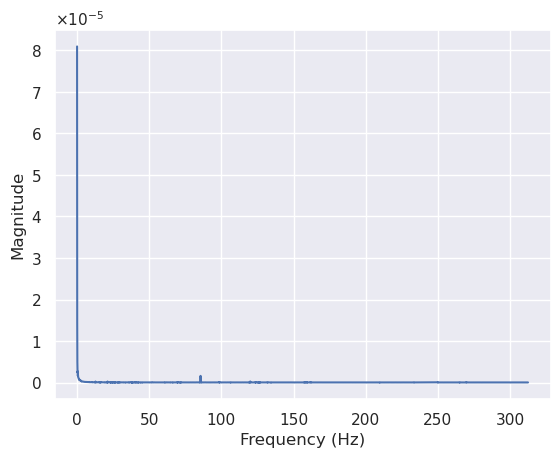

In [10]:
das.fft()

Signal updated with band-pass filter.


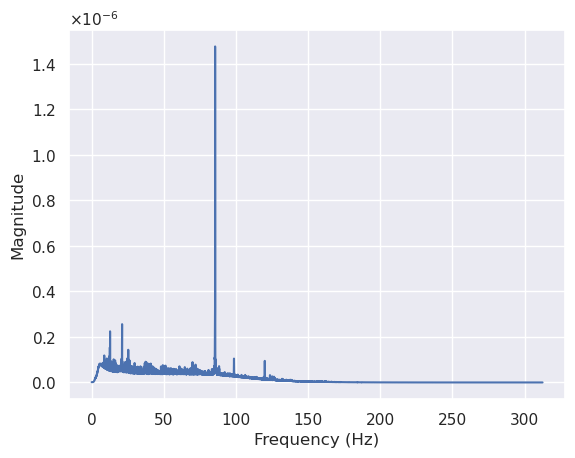

In [12]:
das.reset()
das.bandpass_filter(5, 100)
das.fft()

In [13]:
start_time = time.time()
das.bandpass_filter(15, 25)
time_bandpass = time.time()
print(f'time_bandpass: {time_bandpass - start_time}')

Signal updated with band-pass filter.


time_bandpass: 3.414003610610962


vmin: -2.18e-10, vmax: 2.18e-10


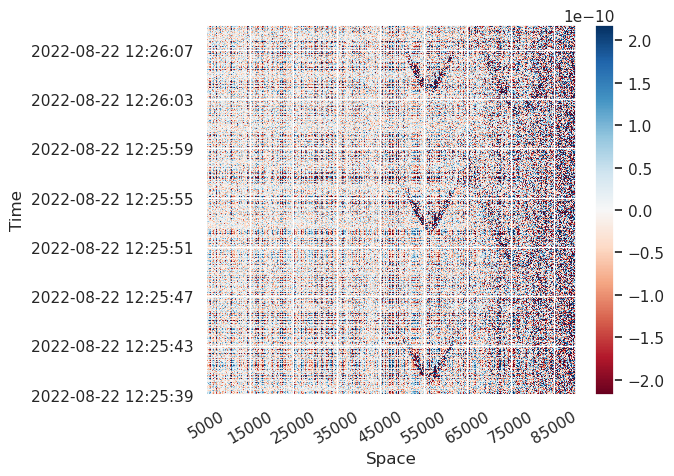

In [14]:
das.heatmap(xticks_rotate=30)

time_abs: 0.6895813941955566


vmax: 2.18e-10


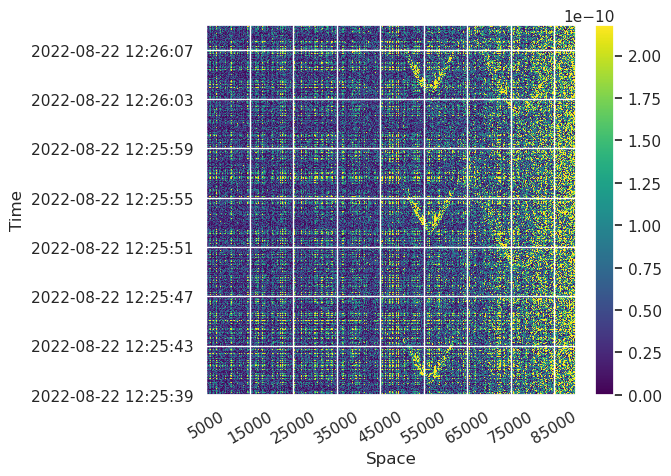

In [15]:
start_time = time.time()
das.signal = np.abs(das.signal)
time_abs = time.time()
print(f'time_abs: {time_abs - start_time}')
das.heatmap(xticks_rotate=30)

Signal updated with new temporal sampling rate 25 and new spatial sampling rate 0.010.
vmax: 1.41e-10


time_sample: 32.61207842826843


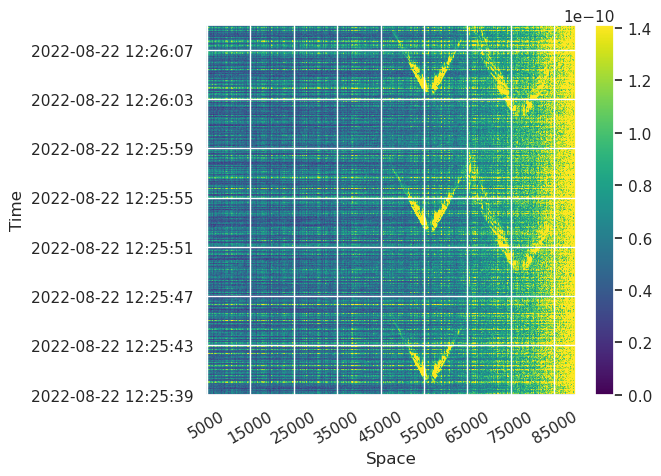

In [16]:
das.sample(meters=100, seconds=1/25)
time_sample = time.time()
print(f'time_sample: {time_sample - time_abs}')
das.heatmap(xticks_rotate=30)

Signal updated with Gaussian smoothing.
vmax: 1.35e-10


time_gauss: 0.4243645668029785


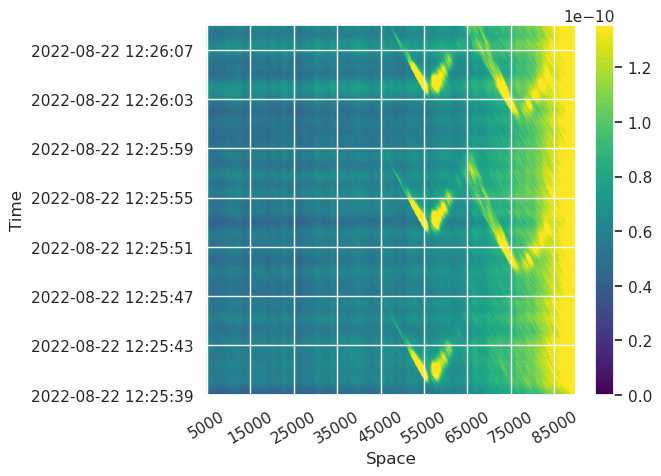

In [17]:
das.gaussian_smooth(-1500.01, -1500, unit='m/s', std_s=500)
time_gauss = time.time()
print(f'time_gauss: {time_gauss - time_sample}')
das.heatmap(xticks_rotate=30)

Signal updated with Sobel filter.
vmax: 1.98e-11


time_sobel: 0.5172426700592041


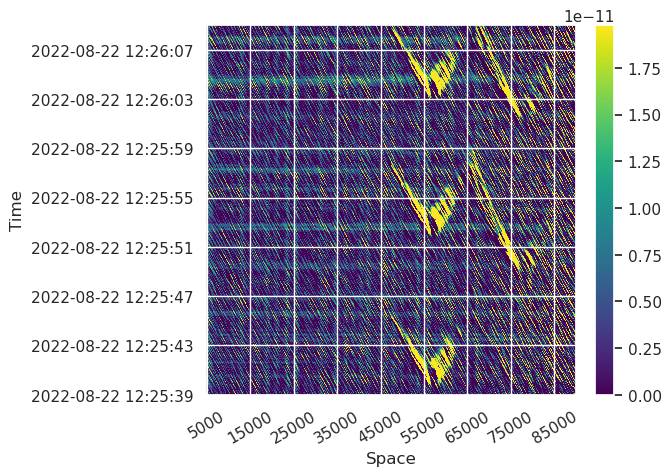

In [18]:
das.sobel_filter(pos_grads=True)
time_sobel = time.time()
print(f'time_sobel: {time_sobel - time_gauss}')
das.heatmap(xticks_rotate=30)

Signal updated with binary transform with threshold 2.1e-11.


time_binary: 0.39306211471557617


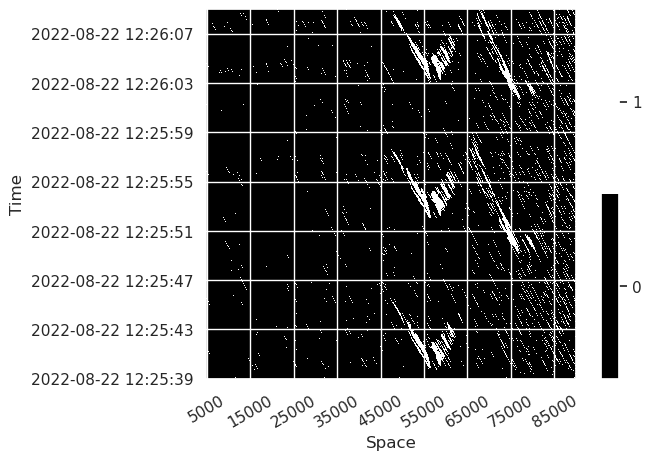

In [19]:
das.binary_transform(threshold=2.1e-11)
time_binary = time.time()
print(f'time_binary: {time_binary - time_sobel}')
das.heatmap(xticks_rotate=30)

16 lines are detected.


time_hough: 0.33942079544067383


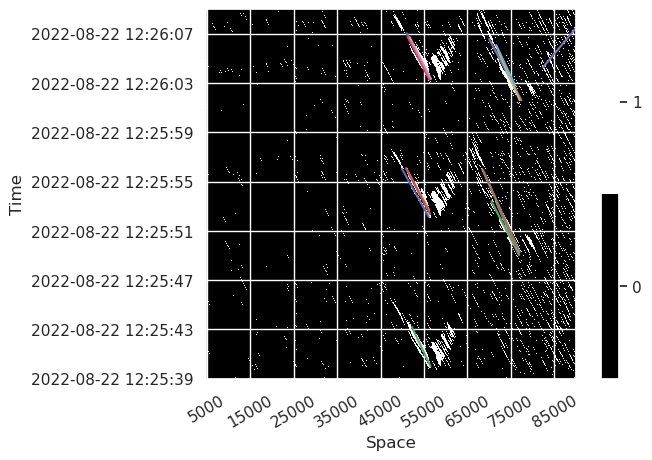

In [20]:
das.hough_transform(
    target_speed=(1500+1500.01)/2,
    speed_res=10,
    length_meters=4000,
    threshold_percent=0.8,
    max_line_gap_percent=0.1,
    speed_unit='m/s',    
)
time_hough = time.time()
print(f'time_hough: {time_hough - time_binary}')
das.heatmap(xticks_rotate=30)

time_dbscan: 0.2799990177154541


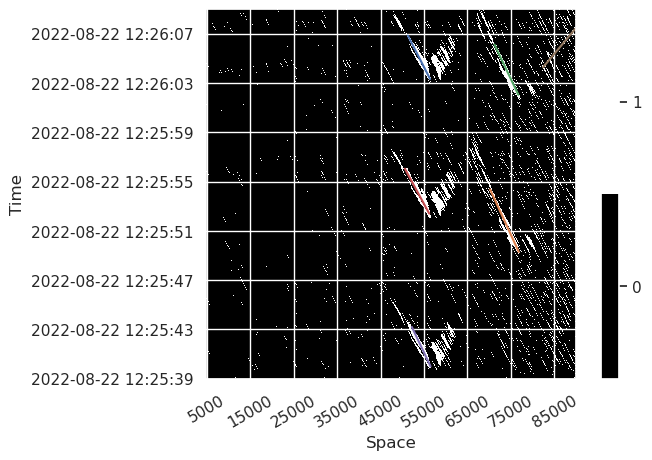

In [21]:
das.dbscan(eps_seconds=3)
time_dbscan = time.time()
print(f'time_dbscan: {time_dbscan - time_hough}')
das.heatmap(xticks_rotate=30)

In [22]:
das.lines_df

,speed_kmh,speed_ms,s,t,s1,t1,s2,t2,s1_edge,t1_edge,...,x1,y1,x2,y2,x1_edge,y1_edge,x2_edge,y2_edge,y1_edge_ext,y2_edge_ext
0,-5215.909091,-1448.863636,-5100.0,3.52,56400.0,2022-08-22 12:26:03.320,51300.0,2022-08-22 12:26:06.840,89900.000000,2022-08-22 12:25:40.198431373,...,514.0,608.0,463.0,696.0,849.000000,29.960784,432.284091,749.000000,1494.901961,29.960784
1,-4677.165354,-1299.212598,-6600.0,5.08,76800.0,2022-08-22 12:25:49.280,70200.0,2022-08-22 12:25:54.360,89900.000000,2022-08-22 12:25:39.196969697,...,718.0,257.0,652.0,384.0,849.000000,4.924242,462.314961,749.000000,1638.606061,4.924242
2,-4852.941176,-1348.039216,-5500.0,4.08,76700.0,2022-08-22 12:26:02.040,71200.0,2022-08-22 12:26:06.120,89900.000000,2022-08-22 12:25:52.248000000,...,717.0,576.0,662.0,678.0,849.000000,331.200000,623.715686,749.000000,1905.709091,331.200000
3,-5538.461538,-1538.461538,-5600.0,3.64,56200.0,2022-08-22 12:25:52.400,50600.0,2022-08-22 12:25:56.040,76815.384615,2022-08-22 12:25:39.000000000,...,512.0,335.0,456.0,426.0,718.153846,0.000000,257.230769,749.000000,1167.000000,-212.625000
4,-4837.500000,-1343.750000,-4300.0,3.20,56500.0,2022-08-22 12:25:40.000,52200.0,2022-08-22 12:25:43.200,57843.750000,2022-08-22 12:25:39.000000000,...,515.0,25.0,472.0,105.0,528.437500,0.000000,125.850000,749.000000,983.139535,-596.395349
5,8538.461538,2371.794872,7400.0,3.12,82400.0,2022-08-22 12:26:04.280,89800.0,2022-08-22 12:26:07.400,22441.025641,2022-08-22 12:25:39.000000000,...,774.0,632.0,848.0,710.0,174.410256,0.000000,849.000000,711.054054,-183.837838,711.054054
